<a href="https://colab.research.google.com/github/ash-netizen/CREDIT_EDA/blob/main/EDA_CASE_STUDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #Credit EDA Case Study Assessment 


##The objective of this case study is to employ the knowledge and techniques learnt in EDA (Exploratory Data Analysis) module and provide a meaningful and tangible outcome of the work.

As this is already covered in the problem statement, we have to process the files, apply data cleaning and then continue with various types of analysis applicable using python or any other supporting tool as we see fit(Tableau is mentioned)

In this file, we are only going to focus on the Data Sourcing, various factors to be considered in the Data Cleaning phase followed by Univariate Analysis on the whole dataset to see how the distribution looks like.

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import pandas_profiling as pp

In [ ]:
df = pd.read_csv(r'C:/Users/ashish.i.pandey/Downloads/application_data.csv')

In [ ]:
df_previous = pd.read_csv(r'C:/Users/ashish.i.pandey/Downloads/previous_application.csv')

In [ ]:
#using profiling library to initiate data cleaning and get an overview
appDataProfile = pp.ProfileReport(df)
appDataProfile.to_file(outputfile="applicationdata.html")

In [ ]:
appDataProfile

In [ ]:
#Invoking function to remove coluns and rows having more than 50% Null Values
def removeNulls(dataframe, axis =1, percent=0.5):
    '''
    #removeNull function will remove the rows and columns based on parameters provided.
    # dataframe : Name of the dataframe  
    #axis      : axis = 0 defines drop rows, axis =1(default) defines drop columns    
    #percent   : percent of data where column/rows values are null,default is 0.5(50%)
              
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df

In [ ]:
df = removeNulls(df, axis =1,percent = 0.5)

Number of Columns dropped	:  41

Old dataset rows,columns (307511, 122) 
New dataset rows,columns (307511, 81)


In [ ]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 81 columns]

In [ ]:
df1 = removeNulls(df, axis =0,percent = 0.5)


Number of Rows dropped	:  0

Old dataset rows,columns (307511, 81) 
New dataset rows,columns (307511, 81)


In [ ]:
##Remove columns where number of unique value is only 1


unique = df.nunique()
unique = unique[unique.values == 1]

In [ ]:
df.drop(labels = list(unique.index), axis =1, inplace=True)


In [ ]:
pd.set_option('display.max_columns',500)

In [ ]:
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
6           100009       0         Cash loans           F            Y   
7           100010       0         Cash loans           M            Y   
8           100011       0         Cash loans           F            N   
9           100012       0    Revolving loans           M            N   
10          100014       0         Cash loans           F            N   
11          100015       0         Cash loans           F            N   
12          100016       0         Cash loans           F            N   
13          100017       0         Cash loans           M            Y   
14          100018       0         Cash loans           F            N   
15          100019       0         Cash loans           M            Y   
16          100020       0         Cash loans           M            N   
17          100021       0    Revolving loans           F            N   
18          100022       0    Revolving loans           F            N   
19          100023       0         Cash loans           F            N   
20          100024       0    Revolving loans           M            Y   
21          100025       0         Cash loans           F            Y   
22          100026       0         Cash loans           F            N   
23          100027       0         Cash loans           F            N   
24          100029       0         Cash loans           M            Y   
25          100030       0         Cash loans           F            N   
26          100031       1         Cash loans           F            N   
27          100032       0         Cash loans           M            N   
28          100033       0         Cash loans           M            Y   
29          100034       0    Revolving loans           M            N   
...            ...     ...                ...         ...          ...   
307481      456225       1         Cash loans           M            N   
307482      456226       0         Cash loans           F            Y   
307483      456227       0         Cash loans           F            N   
307484      456228       0         Cash loans           F            Y   
307485      456229       0    Revolving loans           F            N   
307486      456230       0         Cash loans           F            Y   
307487      456231       0         Cash loans           M            N   
307488      456232       0         Cash loans           F            N   
307489      456233       1         Cash loans           F            N   
307490      456234       0         Cash loans           M            N   
307491      456235       0         Cash loans           M            Y   
307492      456236       0         Cash loans           M            Y   
307493      456237       0         Cash loans           F            N   
307494      456238       0         Cash loans           M            Y   
307495      456239       0         Cash loans           M            Y   
307496      456240       0    Revolving loans           F            N   
307497      456241       0         Cash loans           F            Y   
307498      456242       0         Cash loans           M            Y   
307499      456243       0         Cash loans           F            N   
307500      456244       0         Cash loans           F            N   
307501      456245       0         Cash loans           F            N   
307502      456246       0         Cash loans           F            N   
307503      

In [ ]:
# keeping few columns which will help for analysis after having complete review done

dfnew = df[['NAME_CONTRACT_TYPE', 'TARGET', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR']].copy()

In [ ]:
dfnew

NAME_CONTRACT_TYPE  TARGET FLAG_OWN_REALTY  CNT_CHILDREN  \
0              Cash loans       1               Y             0   
1              Cash loans       0               N             0   
2         Revolving loans       0               Y             0   
3              Cash loans       0               Y             0   
4              Cash loans       0               Y             0   
5              Cash loans       0               Y             0   
6              Cash loans       0               Y             1   
7              Cash loans       0               Y             0   
8              Cash loans       0               Y             0   
9         Revolving loans       0               Y             0   
10             Cash loans       0               Y             1   
11             Cash loans       0               Y             0   
12             Cash loans       0               Y             0   
13             Cash loans       0               N             1   
14             Cash loans       0               Y             0   
15             Cash loans       0               Y             0   
16             Cash loans       0               N             0   
17        Revolving loans       0               Y             1   
18        Revolving loans       0               Y             0   
19             Cash loans       0               Y             1   
20        Revolving loans       0               Y             0   
21             Cash loans       0               Y             1   
22             Cash loans       0               N             1   
23             Cash loans       0               Y             0   
24             Cash loans       0               N             2   
25             Cash loans       0               Y             0   
26             Cash loans       1               Y             0   
27             Cash loans       0               Y             1   
28             Cash loans       0               Y             0   
29        Revolving loans       0               Y             0   
...                   ...     ...             ...           ...   
307481         Cash loans       1               Y             0   
307482         Cash loans       0               Y             0   
307483         Cash loans       0               Y             0   
307484         Cash loans       0               N             0   
307485    Revolving loans       0               Y             1   
307486         Cash loans       0               Y             1   
307487         Cash loans       0               Y             0   
307488         Cash loans       0               N             0   
307489         Cash loans       1               Y             0   
307490         Cash loans       0               Y             0   
307491         Cash loans       0               Y             2   
307492         Cash loans       0               Y             0   
307493         Cash loans       0               Y             0   
307494         Cash loans       0               N             1   
307495         Cash loans       0               N             0   
307496    Revolving loans       0               N             0   
307497         Cash loans       0               Y             0   
307498         Cash loans       0               Y             0   
307499         Cash loans       0               Y             0   
307500         Cash loans       0               Y             0   
307501         Cash loans       0               Y             3   
307502         Cash loans       0               Y             1   
307503         Cash loans       0               Y             0   
307504         Cash loans       0               Y             0   
307505         Cash loans       0               Y             0   
307506         Cash loans       0               N             0   
307507         Cash loans       0               Y             0   
307508         Cash loans       0               Y     

In [ ]:
#Removing outliers from columns we need to analyse 

q1 = dfnew['AMT_INCOME_TOTAL'].quantile(0.5)
q3 = dfnew['AMT_INCOME_TOTAL'].quantile(0.95)
iqr = q3-q1 #Interquartile range
low = q1-1.5*iqr
high = q1+1.5*iqr
dfnew = dfnew.loc[(dfnew.AMT_INCOME_TOTAL > low) & (dfnew.AMT_INCOME_TOTAL < high)]

In [ ]:
#Removing outlier for "DAYS_EMPLOYED"

q1 = dfnew['DAYS_EMPLOYED'].quantile(0.5)
q3 = dfnew['DAYS_EMPLOYED'].quantile(0.95)
iqr = q3-q1 #Interquartile range
low = q1-1.5*iqr
high = q1+1.5*iqr
dfnew = dfnew.loc[(dfnew.DAYS_EMPLOYED > low) & (dfnew.DAYS_EMPLOYED < high)]

In [ ]:
#Removing outlier for "DAYS_ID_PUBLISH"

q1 = dfnew['DAYS_ID_PUBLISH'].quantile(0.5)
q3 = dfnew['DAYS_ID_PUBLISH'].quantile(0.95)
iqr = q3-q1 #Interquartile range
low = q1-1.5*iqr
high = q1+1.5*iqr
dfnew = dfnew.loc[(dfnew.DAYS_ID_PUBLISH > low) & (dfnew.DAYS_ID_PUBLISH < high)]

In [ ]:
#Removing outlier for "AMT_GOODS_PRICE"

q1 = dfnew['AMT_GOODS_PRICE'].quantile(0.5)
q3 = dfnew['AMT_GOODS_PRICE'].quantile(0.95)
iqr = q3-q1 #Interquartile range
low = q1-1.5*iqr
high = q1+1.5*iqr
dfnew = dfnew.loc[(dfnew.AMT_GOODS_PRICE > low) & (dfnew.AMT_GOODS_PRICE < high)]

In [ ]:
#Removing outlier for "AMT_REQ_CREDIT_BUREAU_YEAR"

q1 = dfnew['AMT_REQ_CREDIT_BUREAU_YEAR'].quantile(0.5)
q3 = dfnew['AMT_REQ_CREDIT_BUREAU_YEAR'].quantile(0.95)
iqr = q3-q1 #Interquartile range
low = q1-1.5*iqr
high = q1+1.5*iqr
dfnew = dfnew.loc[(dfnew.AMT_REQ_CREDIT_BUREAU_YEAR > low) & (dfnew.AMT_REQ_CREDIT_BUREAU_YEAR < high)]

In [ ]:
#Checking Profile Report to make sure If outliers have been removed
pp.ProfileReport(dfnew)
# As we can see in report that outliers for "AMT_INCOME_TOTAL" is removed succesfully since earlier max value was 
#117000000.0 that is one of the outlier
#Also removed outlier for "DAYS_EMPLOYED"
#similarly removed outliers "for AMT_GOODS_PRICE" 

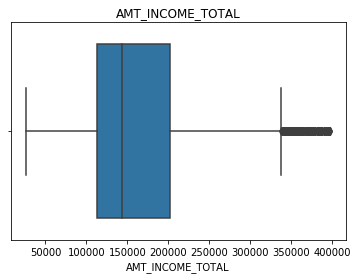

In [ ]:
# boxplot to check the outliers
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(dfnew['AMT_INCOME_TOTAL'])
plt.title('AMT_INCOME_TOTAL')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis on Quantitative Variables

In [ ]:
# splitting data frame based on Target column values
dfnew_Target_0 = dfnew[dfnew.TARGET == 0]


In [ ]:
dfnew_Target_1 = dfnew[dfnew.TARGET == 1]


In [ ]:
#Invoking function for univariate analysis
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

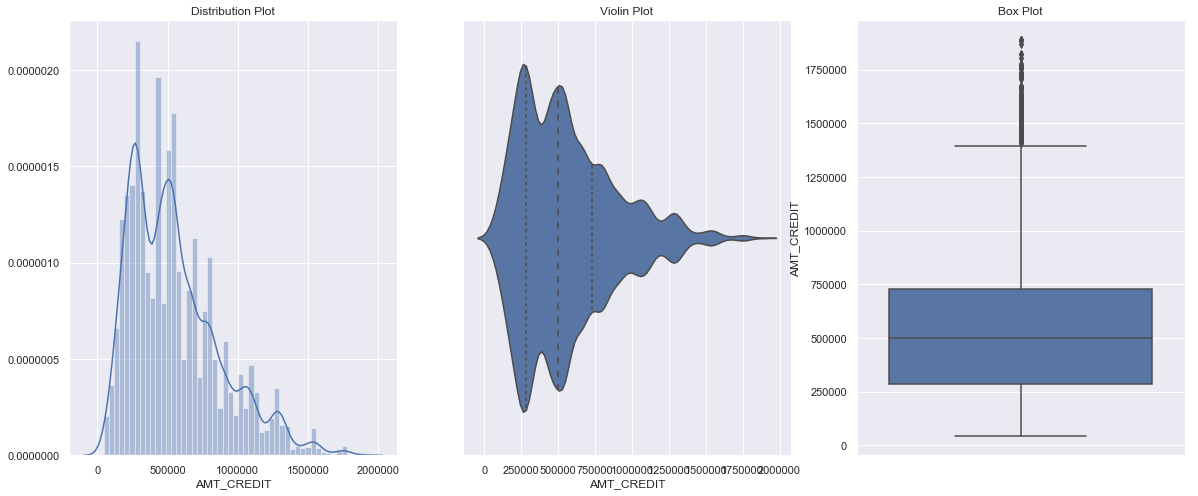

In [ ]:
univariate(df=dfnew_Target_1,col='AMT_CREDIT',vartype=0)

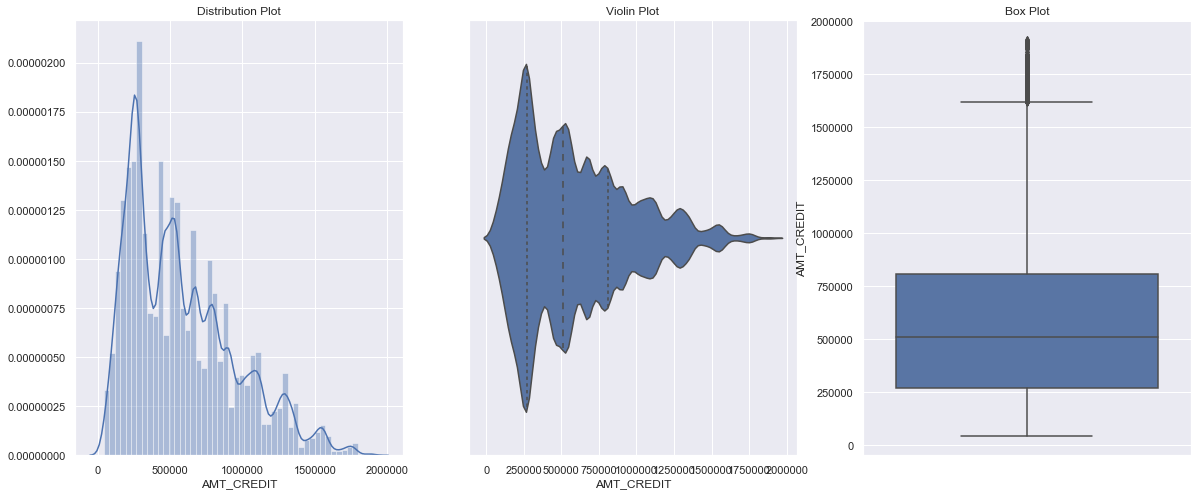

In [ ]:
univariate(df=dfnew_Target_0,col='AMT_CREDIT',vartype=0)

In [ ]:
dfnew_Target_1['EXT_SOURCE_2'].fillna((dfnew_Target_1['EXT_SOURCE_2'].mean()), inplace=True)

C:\Users\ashish.i.pandey\AppData\Local\Continuum\anaconda4\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


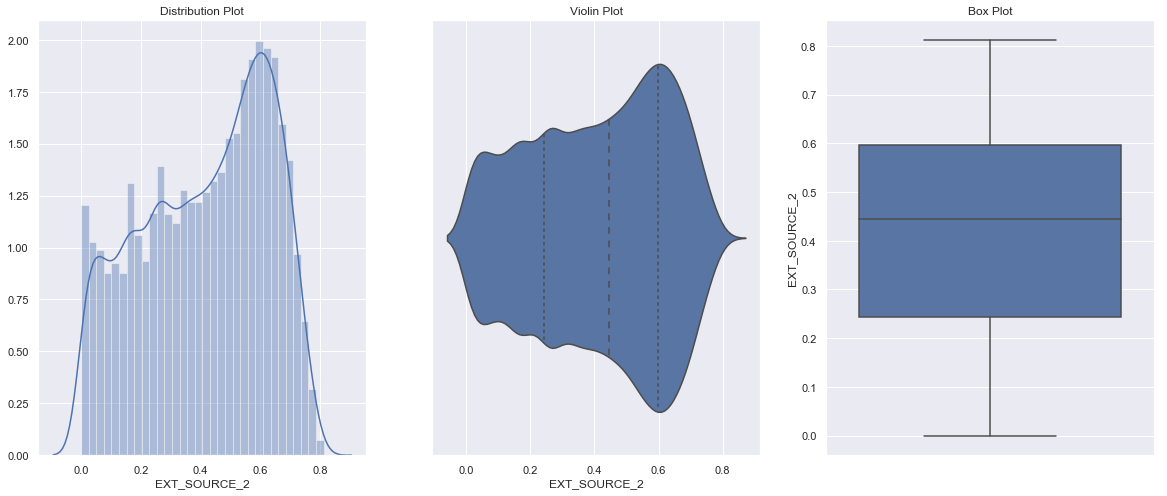

In [ ]:
univariate(df=dfnew_Target_1,col='EXT_SOURCE_2',vartype=0)

In [ ]:
dfnew_Target_0['EXT_SOURCE_2'].fillna((dfnew_Target_0['EXT_SOURCE_2'].mean()), inplace=True)

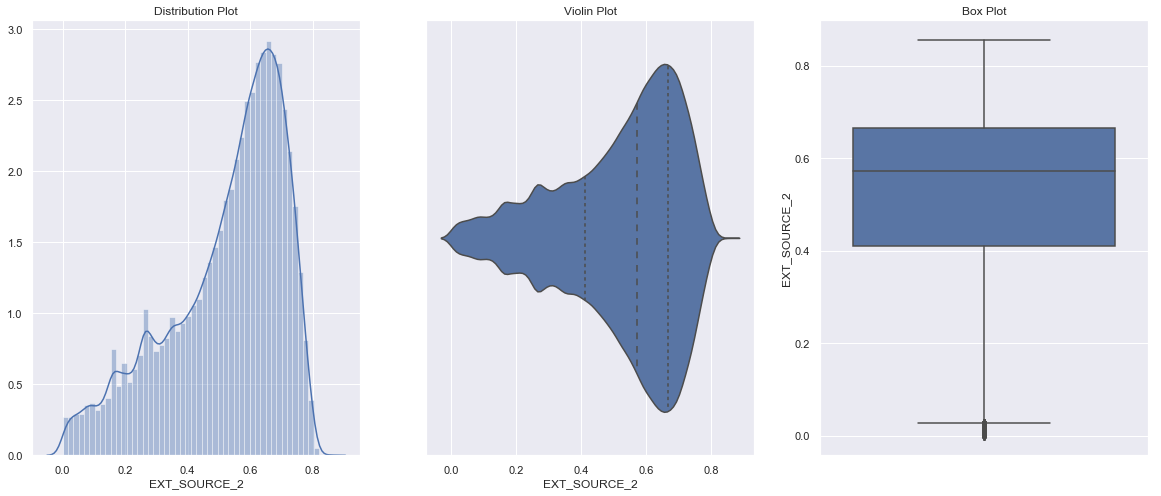

In [ ]:
univariate(df=dfnew_Target_0,col='EXT_SOURCE_2',vartype=0)


In [ ]:
#from above boxplot we can conclude that clients having score(ext_sourec_2) gretaer than .4 are not the ones having difficulties
#while in previous Box plot where having difficulties the score starts from about 0.2-0.3 
# The same conclusion can be seen in other plots as well  such as distribution and violin plots

In [ ]:
dfnew

NAME_CONTRACT_TYPE  TARGET FLAG_OWN_REALTY  CNT_CHILDREN  \
0              Cash loans       1               Y             0   
1              Cash loans       0               N             0   
2         Revolving loans       0               Y             0   
3              Cash loans       0               Y             0   
4              Cash loans       0               Y             0   
5              Cash loans       0               Y             0   
6              Cash loans       0               Y             1   
7              Cash loans       0               Y             0   
8              Cash loans       0               Y             0   
9         Revolving loans       0               Y             0   
10             Cash loans       0               Y             1   
11             Cash loans       0               Y             0   
12             Cash loans       0               Y             0   
13             Cash loans       0               N             1   
14             Cash loans       0               Y             0   
15             Cash loans       0               Y             0   
16             Cash loans       0               N             0   
17        Revolving loans       0               Y             1   
18        Revolving loans       0               Y             0   
19             Cash loans       0               Y             1   
20        Revolving loans       0               Y             0   
21             Cash loans       0               Y             1   
23             Cash loans       0               Y             0   
24             Cash loans       0               N             2   
25             Cash loans       0               Y             0   
26             Cash loans       1               Y             0   
27             Cash loans       0               Y             1   
28             Cash loans       0               Y             0   
29        Revolving loans       0               Y             0   
30             Cash loans       0               Y             0   
...                   ...     ...             ...           ...   
307479         Cash loans       0               Y             1   
307480         Cash loans       0               N             1   
307481         Cash loans       1               Y             0   
307482         Cash loans       0               Y             0   
307483         Cash loans       0               Y             0   
307485    Revolving loans       0               Y             1   
307486         Cash loans       0               Y             1   
307487         Cash loans       0               Y             0   
307488         Cash loans       0               N             0   
307489         Cash loans       1               Y             0   
307490         Cash loans       0               Y             0   
307491         Cash loans       0               Y             2   
307493         Cash loans       0               Y             0   
307494         Cash loans       0               N             1   
307495         Cash loans       0               N             0   
307496    Revolving loans       0               N             0   
307497         Cash loans       0               Y             0   
307498         Cash loans       0               Y             0   
307499         Cash loans       0               Y             0   
307500         Cash loans       0               Y             0   
307501         Cash loans       0               Y             3   
307502         Cash loans       0               Y             1   
307503         Cash loans       0               Y             0   
307504         Cash loans       0               Y             0   
307505         Cash loans       0               Y             0   
307506         Cash loans       0               N             0   
307507         Cash loans       0               Y             0   
307508         Cash loans       0               Y     

In [ ]:
#Creating derived metrics as 'Tenure'

dfnew['Tenure'] = dfnew['AMT_CREDIT']/dfnew['AMT_ANNUITY'] 


In [ ]:
## Again Splitting based on Target values
dfnew_Target_0 = dfnew[dfnew.TARGET == 0]
dfnew_Target_1 = dfnew[dfnew.TARGET == 1]

In [ ]:
# creating derived matrics as 'Capacity' separately in Target and Target 0 Dataframes

dfnew_Target_0['Capacity'] = dfnew_Target_0['AMT_ANNUITY']/dfnew_Target_0['AMT_INCOME_TOTAL'] 
dfnew_Target_1['Capacity'] = dfnew_Target_1['AMT_ANNUITY']/dfnew_Target_1['AMT_INCOME_TOTAL'] 

C:\Users\ashish.i.pandey\AppData\Local\Continuum\anaconda4\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ashish.i.pandey\AppData\Local\Continuum\anaconda4\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [ ]:
dfnew_Target_0

NAME_CONTRACT_TYPE  TARGET FLAG_OWN_REALTY  CNT_CHILDREN  \
1              Cash loans       0               N             0   
2         Revolving loans       0               Y             0   
4              Cash loans       0               Y             0   
5              Cash loans       0               Y             0   
6              Cash loans       0               Y             1   
7              Cash loans       0               Y             0   
8              Cash loans       0               Y             0   
10             Cash loans       0               Y             1   
11             Cash loans       0               Y             0   
12             Cash loans       0               Y             0   
13             Cash loans       0               N             1   
15             Cash loans       0               Y             0   
16             Cash loans       0               N             0   
18        Revolving loans       0               Y             0   
19             Cash loans       0               Y             1   
21             Cash loans       0               Y             1   
23             Cash loans       0               Y             0   
24             Cash loans       0               N             2   
25             Cash loans       0               Y             0   
27             Cash loans       0               Y             1   
28             Cash loans       0               Y             0   
30             Cash loans       0               Y             0   
31             Cash loans       0               Y             0   
32             Cash loans       0               N             0   
33             Cash loans       0               N             1   
35             Cash loans       0               N             0   
36             Cash loans       0               Y             2   
37             Cash loans       0               Y             0   
38             Cash loans       0               Y             0   
39        Revolving loans       0               Y             0   
...                   ...     ...             ...           ...   
307470         Cash loans       0               Y             0   
307471         Cash loans       0               Y             2   
307472         Cash loans       0               Y             1   
307473         Cash loans       0               Y             1   
307476         Cash loans       0               N             2   
307477         Cash loans       0               Y             0   
307478         Cash loans       0               Y             0   
307479         Cash loans       0               Y             1   
307480         Cash loans       0               N             1   
307482         Cash loans       0               Y             0   
307483         Cash loans       0               Y             0   
307485    Revolving loans       0               Y             1   
307486         Cash loans       0               Y             1   
307487         Cash loans       0               Y             0   
307488         Cash loans       0               N             0   
307490         Cash loans       0               Y             0   
307491         Cash loans       0               Y             2   
307493         Cash loans       0               Y             0   
307494         Cash loans       0               N             1   
307495         Cash loans       0               N             0   
307496    Revolving loans       0               N             0   
307497         Cash loans       0               Y             0   
307498         Cash loans       0               Y             0   
307499         Cash loans       0               Y             0   
307500         Cash loans       0               Y             0   
307502         Cash loans       0               Y             1   
307503         Cash loans       0               Y             0   
307505         Cash loans       0               Y     

In [ ]:
#Replacing Nans with Mean for New derived Column
dfnew_Target_0['Tenure'].fillna((dfnew_Target_0['Tenure'].mean()), inplace=True)
dfnew_Target_1['Tenure'].fillna((dfnew_Target_1['Tenure'].mean()), inplace=True)


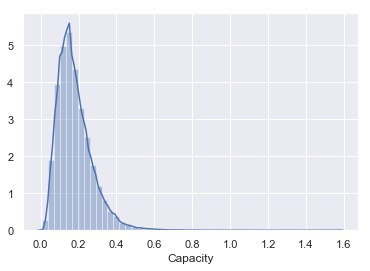

In [ ]:
# simple density plot
dfnew_Target_0['Capacity'].fillna((dfnew_Target_0['Capacity'].mean()), inplace=True)
dfnew_Target_1['Capacity'].fillna((dfnew_Target_0['Capacity'].mean()), inplace=True)
sns.distplot(dfnew_Target_0['Capacity'])
plt.show()

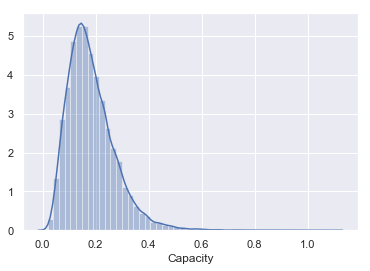

In [ ]:
# simple density plot for clients having Difficulties
sns.distplot(dfnew_Target_1['Capacity'])
plt.show()

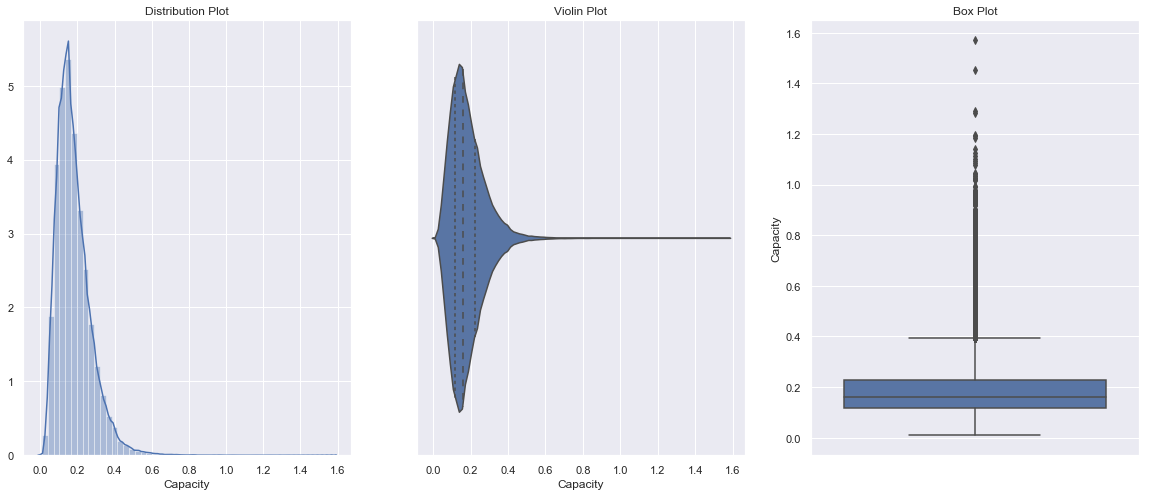

In [ ]:
univariate(df=dfnew_Target_0,col='Capacity',vartype=0)

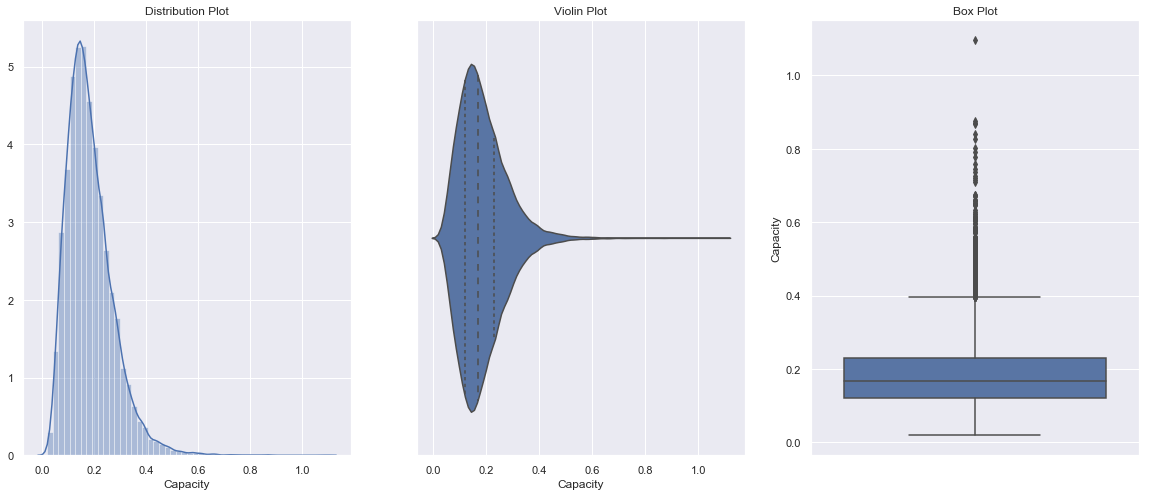

In [ ]:
univariate(df=dfnew_Target_1,col='Capacity',vartype=0)

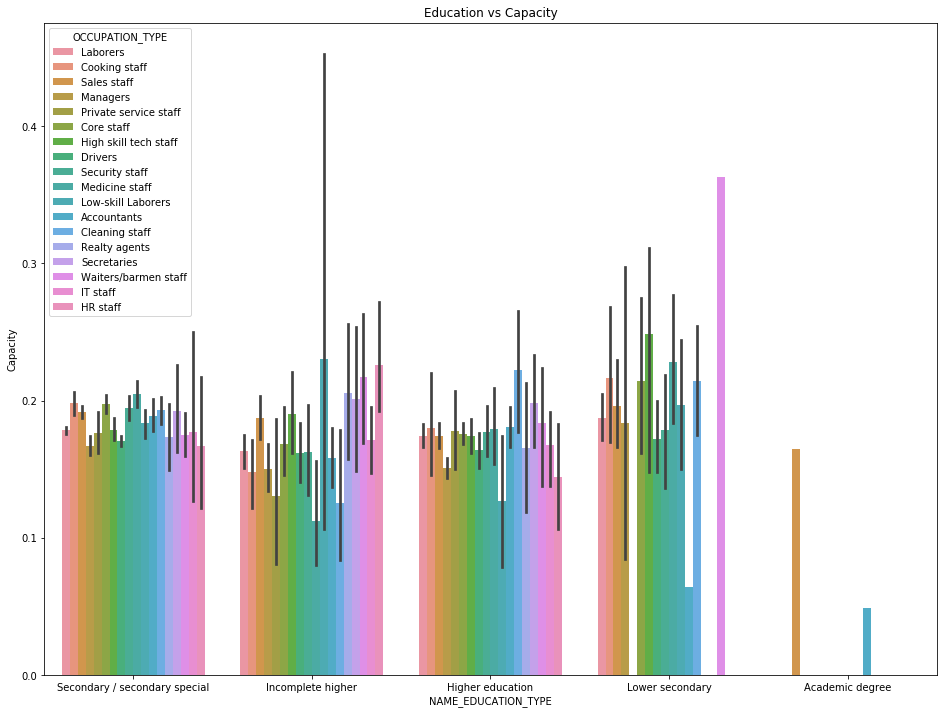

In [ ]:
#Bivariate analysis with 'Capacity'
plt.figure(figsize=(16,12))
sns.barplot(data =dfnew_Target_1, x='NAME_EDUCATION_TYPE', y='Capacity', hue = 'OCCUPATION_TYPE')
plt.title('Education vs Capacity')
plt.show()

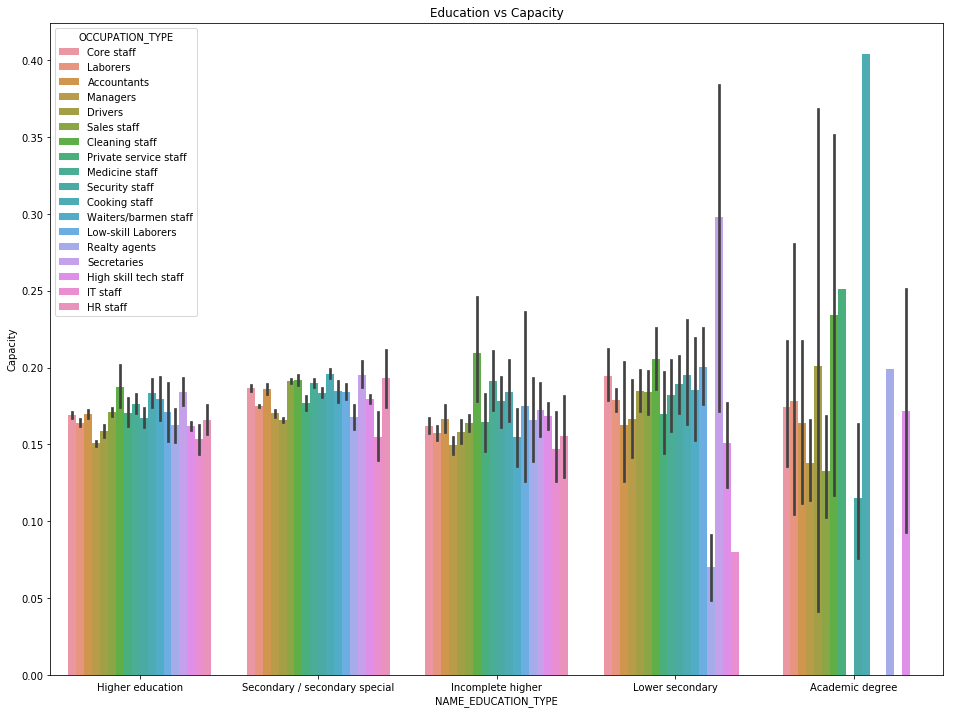

In [ ]:
#Bivariate analysis with 'Capacity'
plt.figure(figsize=(16,12))
sns.barplot(data =dfnew_Target_0, x='NAME_EDUCATION_TYPE', y='Capacity', hue = 'OCCUPATION_TYPE')
plt.title('Education vs Capacity')
plt.show()

# Conclusion  
## we can see that defaulters has very less no. of Academic degrees and also less capacity

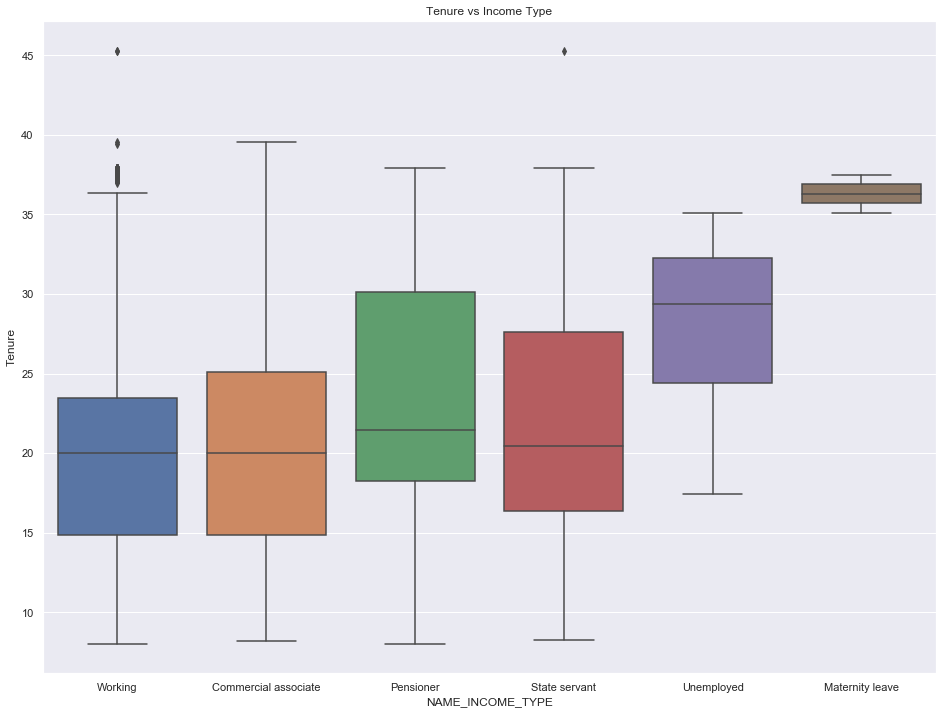

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,12))
sns.boxplot(data =dfnew_Target_1, x='NAME_INCOME_TYPE', y='Tenure',)
plt.title('Tenure vs Income Type')
plt.show()

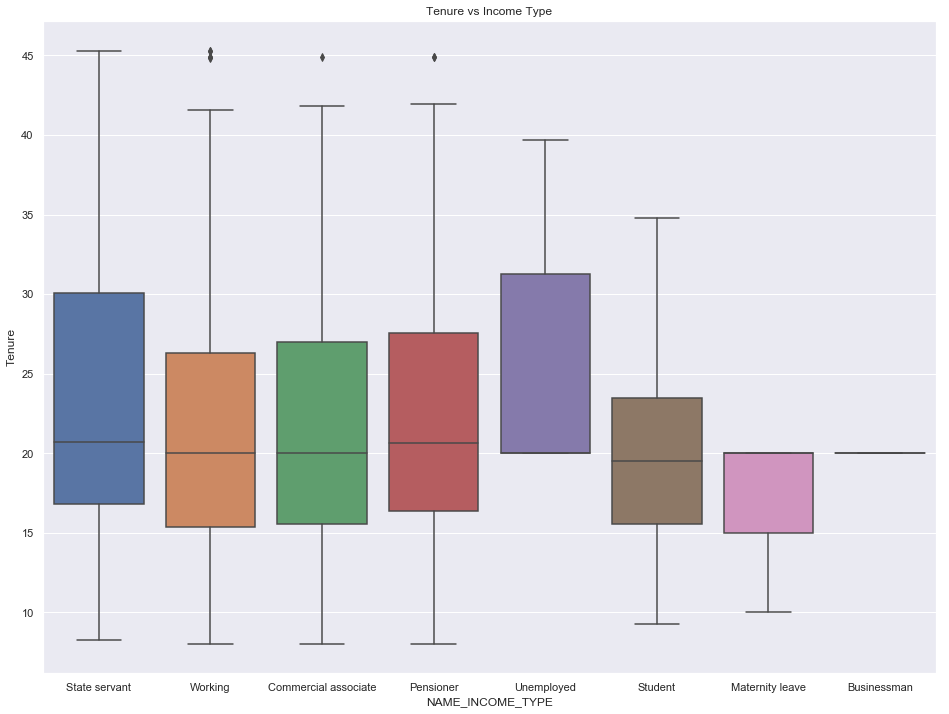

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,12))
sns.boxplot(data =dfnew_Target_0, x='NAME_INCOME_TYPE', y='Tenure',)
plt.title('Tenure vs Income Type')
plt.show()

# Conclusion

In [ ]:
# As we can conclude from above that Pensioners are having more difficulties in Payment in case where Tenure is 25-30

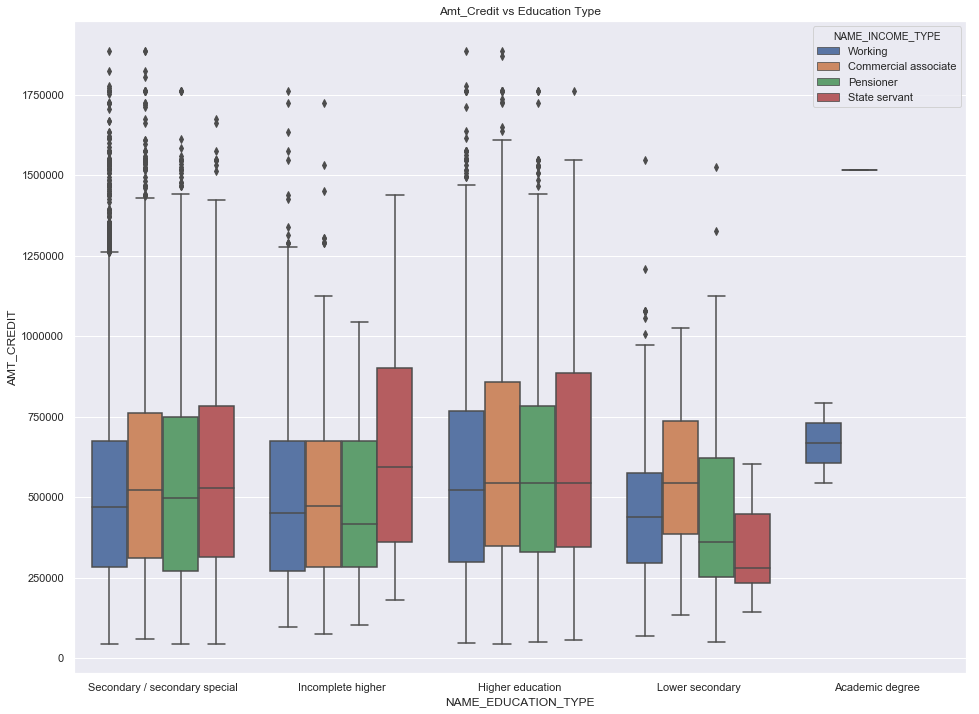

In [ ]:
plt.figure(figsize=(16,12))
sns.boxplot(data =dfnew_Target_1, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue = 'NAME_INCOME_TYPE')
plt.title('Amt_Credit vs Education Type')
plt.show()

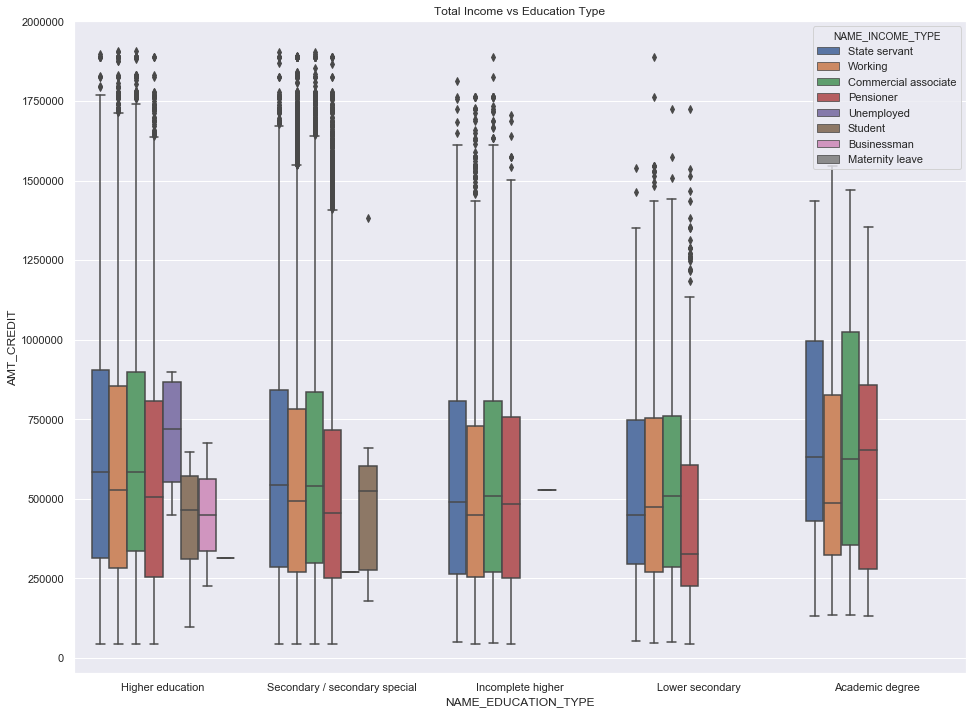

In [ ]:
plt.figure(figsize=(16,12))
sns.boxplot(data =dfnew_Target_0, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue = 'NAME_INCOME_TYPE')
plt.title('Total Income vs Education Type')
plt.show()

# Conclusion

In [ ]:
# as we can conclude from above that clients having academic degree and having credit upto 10 lac are more likely to pay than
# while in defaulters we can easily see that there are very less people who has degree(except working ones) and credit is also less than 7.5 lac

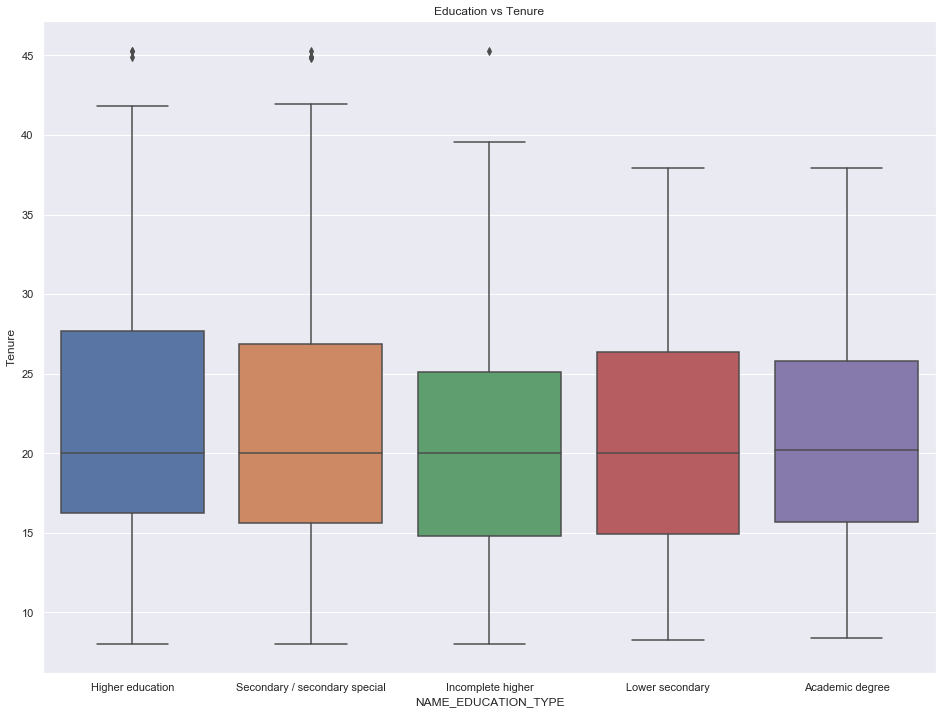

In [ ]:
# Median for academic degree is above 20 in all other cases
plt.figure(figsize=(16,12))
sns.boxplot(data =dfnew_Target_0, x='NAME_EDUCATION_TYPE', y='Tenure')
plt.title('Education vs Tenure')
plt.show()

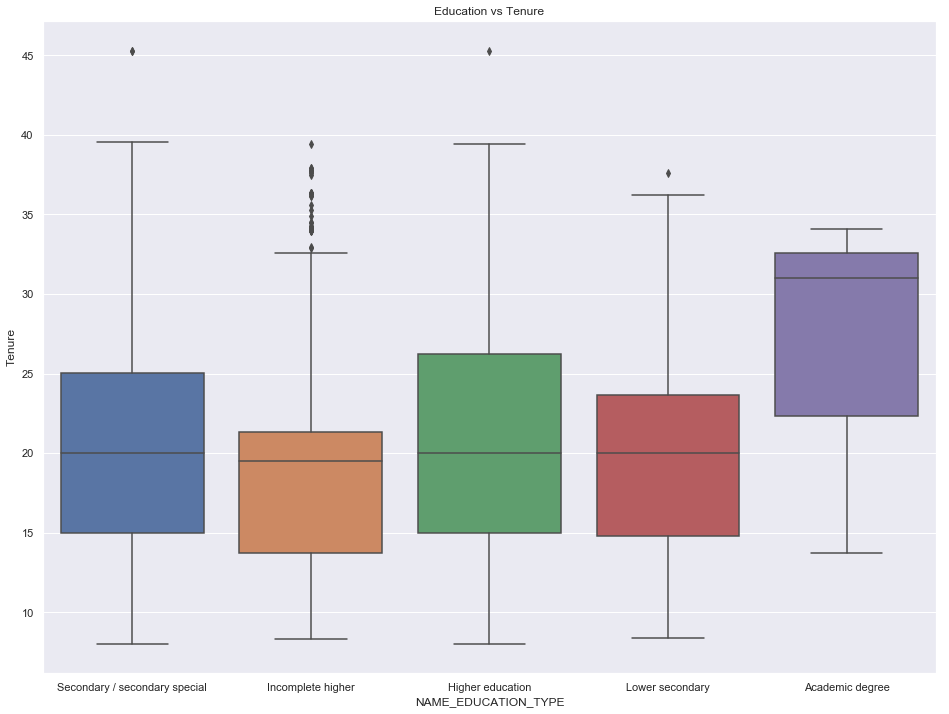

In [ ]:
# Median for academic degree vs Tenure is above 30 when having payment difficulties
plt.figure(figsize=(16,12))
sns.boxplot(data =dfnew_Target_1, x='NAME_EDUCATION_TYPE', y='Tenure')
plt.title('Education vs Tenure')
plt.show()

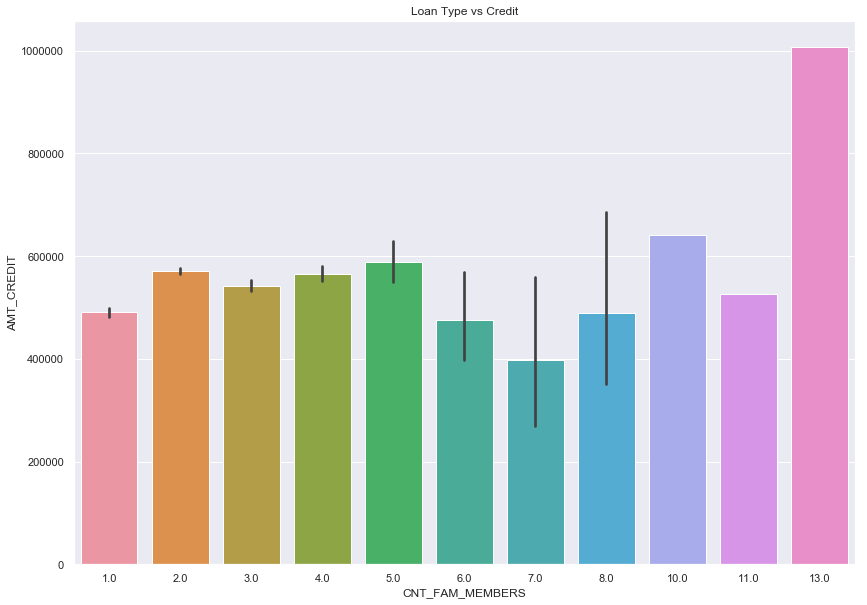

In [ ]:
plt.figure(figsize=(14,10))
sns.barplot(data =dfnew_Target_1, x='CNT_FAM_MEMBERS', y='AMT_CREDIT')
plt.title('Loan Type vs Credit')    
plt.show()

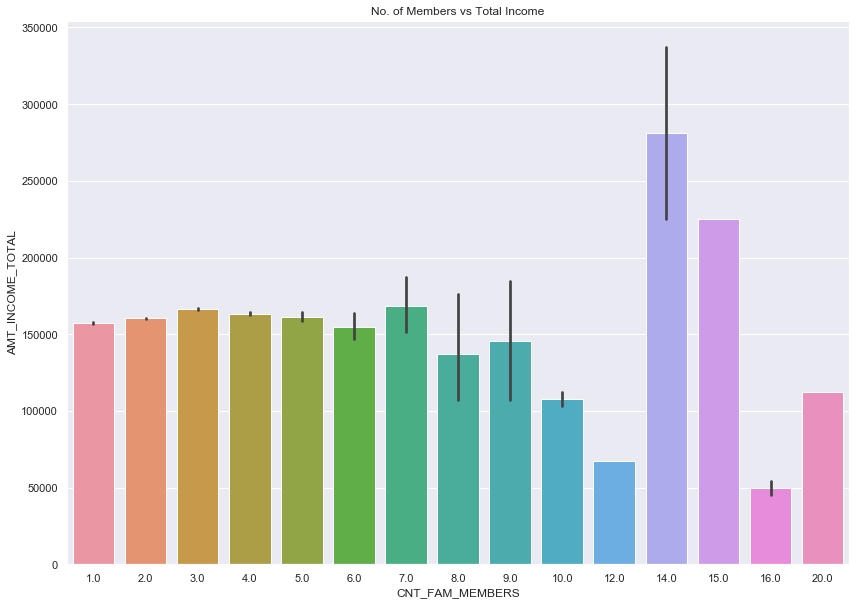

In [ ]:
plt.figure(figsize=(14,10))
sns.barplot(data =dfnew_Target_0, x='CNT_FAM_MEMBERS', y='AMT_INCOME_TOTAL')
plt.title('No. of Members vs Total Income')    
plt.show()

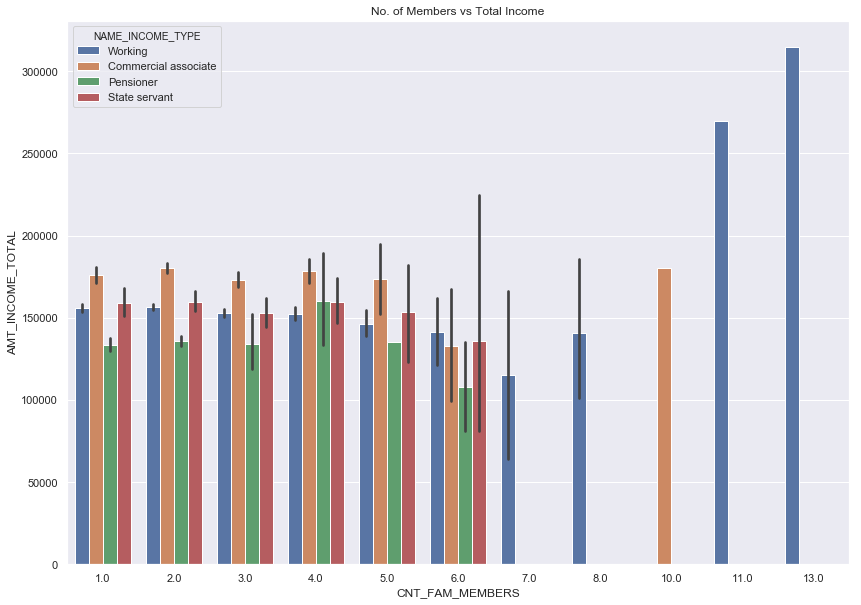

In [ ]:
plt.figure(figsize=(14,10))
sns.barplot(data =dfnew_Target_1, x='CNT_FAM_MEMBERS', y='AMT_INCOME_TOTAL', hue = 'NAME_INCOME_TYPE')
plt.title('No. of Members vs Total Income')    
plt.show()

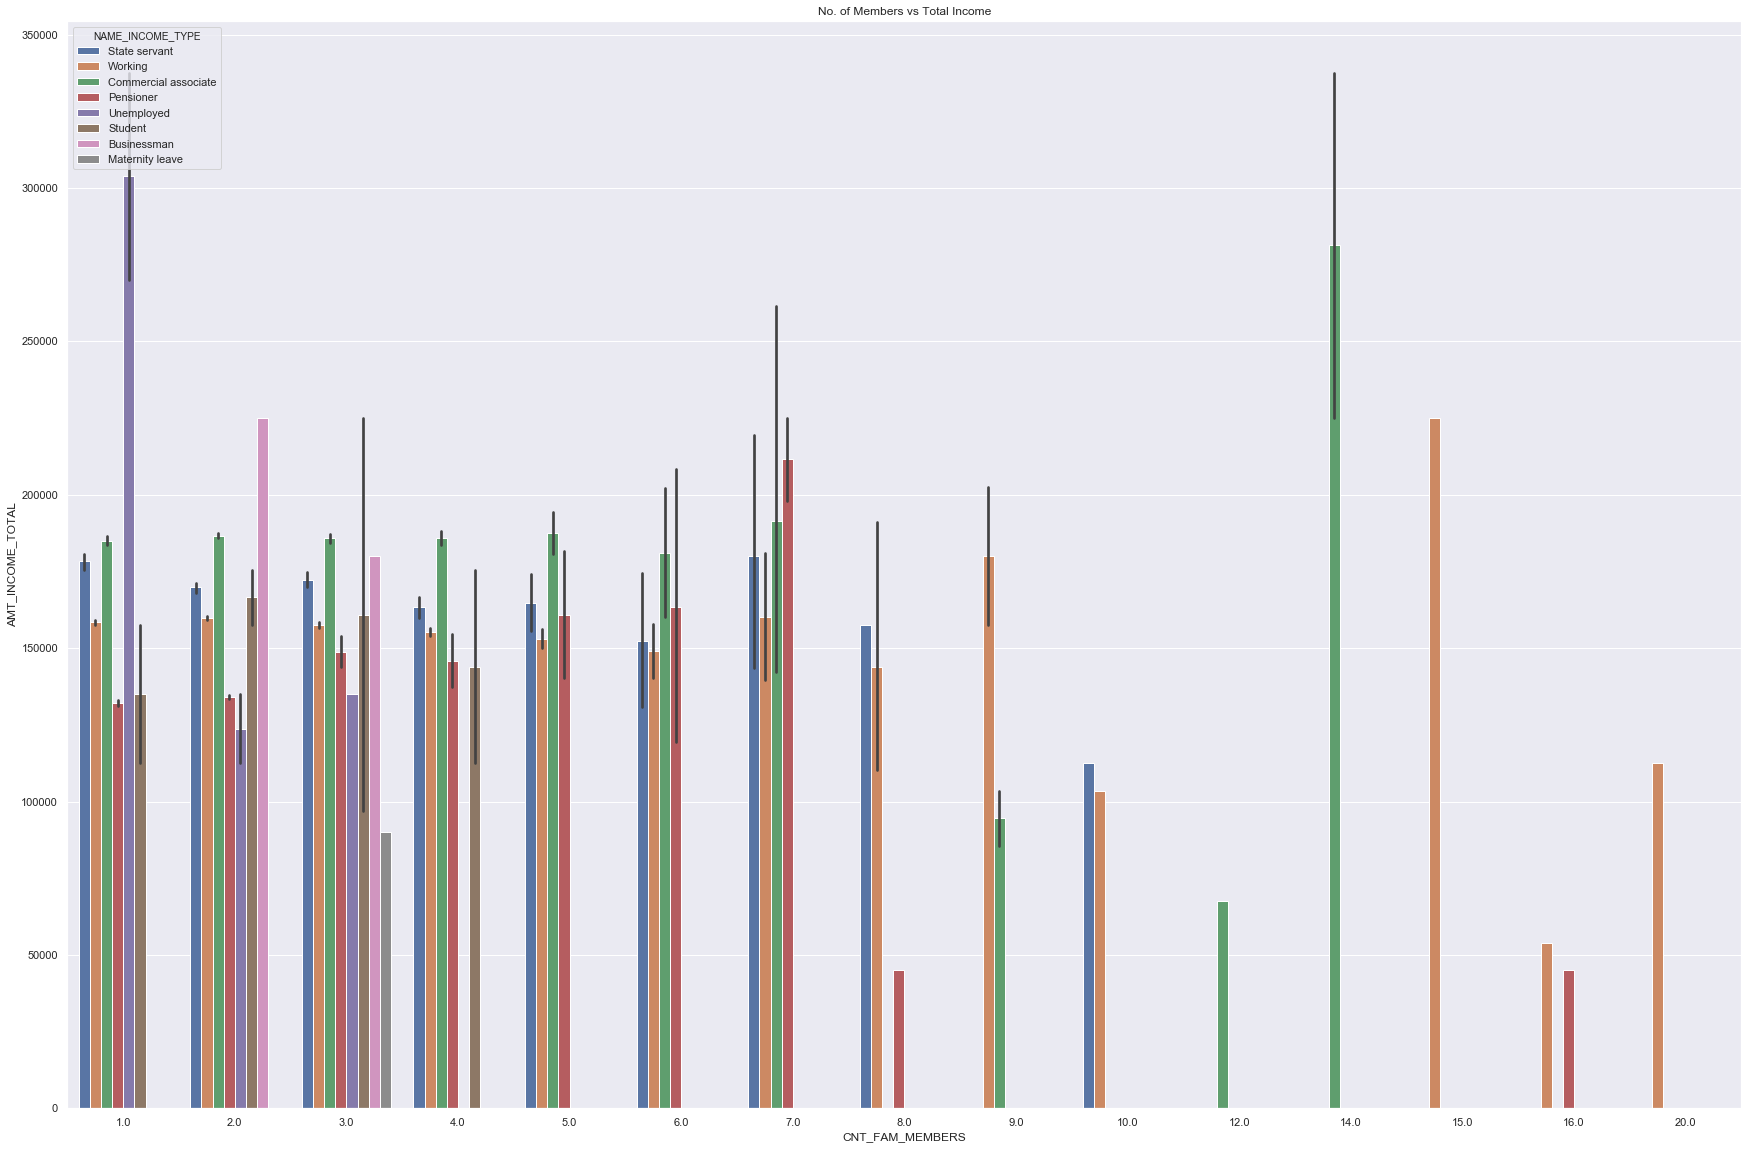

In [ ]:
plt.figure(figsize=(30,20))
sns.barplot(data =dfnew_Target_0, x='CNT_FAM_MEMBERS', y='AMT_INCOME_TOTAL', hue = 'NAME_INCOME_TYPE')
plt.title('No. of Members vs Total Income')    
plt.show()

# Conclusion

In [ ]:
#From above 2 plots we can conclude that clients (Working ones) haing 10 or greater than 10  
# are having difficulties paying than those who has less no of members and less credit

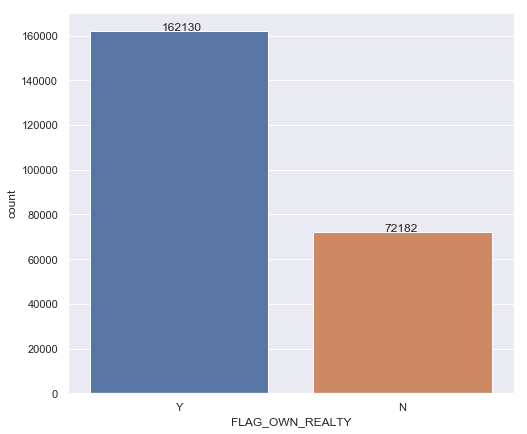

In [ ]:
univariate(df=dfnew_Target_0,col='FLAG_OWN_REALTY',vartype=1)

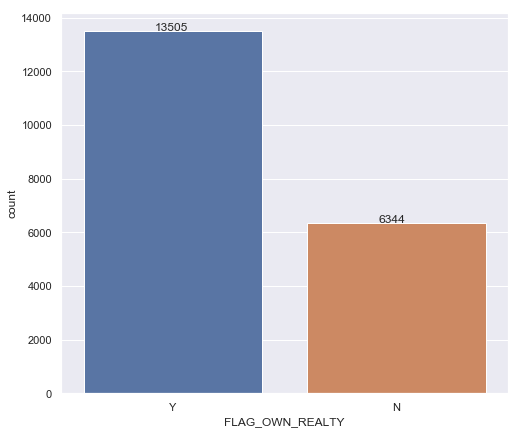

In [ ]:
univariate(df=dfnew_Target_1,col='FLAG_OWN_REALTY',vartype=1)

In [ ]:
#Above analysis clearly states that clients having their own house are more likely to pay successfully.

# Since Ratio of N/Y is 44(Good ones) and 47(in case of defaulters)

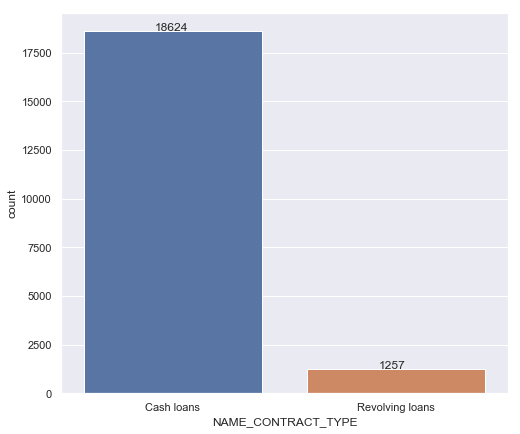

In [ ]:
univariate(df=dfnew_Target_1,col='NAME_CONTRACT_TYPE',vartype=1)

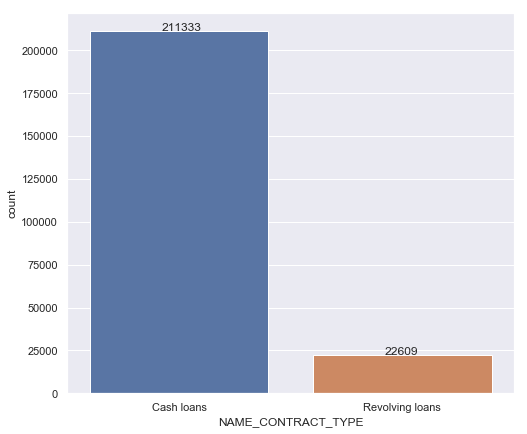

In [ ]:
univariate(df=dfnew_Target_0,col='NAME_CONTRACT_TYPE',vartype=1)

In [ ]:
#More revolving loans implies lower chances of difficulties 
#(As ratio of Revol./Cash is 11 while in case of defaulters it is 6)

In [ ]:
#As per all of the above analysis We can perform Bivariate/Multivariate analysis for any combination of categorical and continuous variables. 
#The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.

#Creating Correlation Matrics 

dfnew_Target_0_correlation = dfnew_Target_0.corr()
dfnew_Target_0_correlation

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
TARGET                         NaN           NaN               NaN   
CNT_CHILDREN                   NaN      1.000000          0.027977   
AMT_INCOME_TOTAL               NaN      0.027977          1.000000   
AMT_CREDIT                     NaN      0.002615          0.360368   
AMT_ANNUITY                    NaN      0.021915          0.441265   
AMT_GOODS_PRICE                NaN     -0.001290          0.363723   
DAYS_EMPLOYED                  NaN     -0.248483         -0.183936   
DAYS_ID_PUBLISH                NaN     -0.029425          0.042756   
CNT_FAM_MEMBERS                NaN      0.879432          0.031302   
EXT_SOURCE_2                   NaN     -0.015296          0.148055   
EXT_SOURCE_3                   NaN     -0.042093         -0.090469   
AMT_REQ_CREDIT_BUREAU_WEEK     NaN     -0.002009          0.007313   
AMT_REQ_CREDIT_BUREAU_MON      NaN     -0.010300          0.067152   
AMT_REQ_CREDIT_BUREAU_YEAR     NaN     -0.041197          0.065569   
Tenure                         NaN     -0.027719          0.080507   
Capacity                       NaN     -0.002567         -0.389583   

                            AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
TARGET                             NaN          NaN              NaN   
CNT_CHILDREN                  0.002615     0.021915        -0.001290   
AMT_INCOME_TOTAL              0.360368     0.441265         0.363723   
AMT_CREDIT                    1.000000     0.757256         0.984904   
AMT_ANNUITY                   0.757256     1.000000         0.761362   
AMT_GOODS_PRICE               0.984904     0.761362         1.000000   
DAYS_EMPLOYED                -0.072674    -0.108884        -0.070990   
DAYS_ID_PUBLISH               0.006618     0.021594         0.004745   
CNT_FAM_MEMBERS               0.063929     0.078911         0.062678   
EXT_SOURCE_2                  0.106362     0.104849         0.113868   
EXT_SOURCE_3                  0.033847     0.026422         0.036869   
AMT_REQ_CREDIT_BUREAU_WEEK   -0.003019     0.012535        -0.002720   
AMT_REQ_CREDIT_BUREAU_MON     0.047179     0.031237         0.049241   
AMT_REQ_CREDIT_BUREAU_YEAR   -0.034210     0.003732        -0.036477   
Tenure                        0.673170     0.103803         0.647187   
Capacity                      0.421635     0.545922         0.419487   

                            DAYS_EMPLOYED  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
TARGET                                NaN              NaN              NaN   
CNT_CHILDREN                    -0.248483        -0.029425         0.879432   
AMT_INCOME_TOTAL                -0.183936         0.042756         0.031302   
AMT_CREDIT                      -0.072674         0.006618         0.063929   
AMT_ANNUITY                     -0.108884         0.021594         0.078911   
AMT_GOODS_PRICE                 -0.070990         0.004745         0.062678   
DAYS_EMPLOYED                    1.000000        -0.270347        -0.242756   
DAYS_ID_PUBLISH                 -0.270347         1.000000        -0.019471   
CNT_FAM_MEMBERS                 -0.242756        -0.019471         1.000000   
EXT_SOURCE_2                    -0.029752        -0.035879        -0.002508   
EXT_SOURCE_3                     0.109722        -0.125918        -0.027816   
AMT_REQ_CREDIT_BUREAU_WEEK       0.002521        -0.001057        -0.000950   
AMT_REQ_CREDIT_BUREAU_MON       -0.034431        -0.010033        -0.008134   
AMT_REQ_CREDIT_BUREAU_YEAR       0.046292        -0.035552        -0.027930   
Tenure                           0.011512        -0.014366         0.002330   
Capacity                         0.075899        -0.024493         0.062246   

                            EXT_SOURCE_2  EXT_SOURCE_3  \
TARGET                               NaN           NaN   
CNT_CHILDREN                   -0.015296     -0.042093   
AMT_INCOME_TOTAL                0.148055     -0.090469   
AMT_CREDIT                      0.10

In [ ]:
dfnew_Target_1_correlation = dfnew_Target_1.corr()
dfnew_Target_1_correlation

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
TARGET                         NaN           NaN               NaN   
CNT_CHILDREN                   NaN      1.000000         -0.002475   
AMT_INCOME_TOTAL               NaN     -0.002475          1.000000   
AMT_CREDIT                     NaN      0.004613          0.329192   
AMT_ANNUITY                    NaN      0.039808          0.415850   
AMT_GOODS_PRICE                NaN     -0.001294          0.331289   
DAYS_EMPLOYED                  NaN     -0.194864         -0.124607   
DAYS_ID_PUBLISH                NaN     -0.034669          0.002928   
CNT_FAM_MEMBERS                NaN      0.888052          0.000488   
EXT_SOURCE_2                   NaN     -0.013500          0.122820   
EXT_SOURCE_3                   NaN     -0.022421         -0.064320   
AMT_REQ_CREDIT_BUREAU_WEEK     NaN     -0.010064          0.010849   
AMT_REQ_CREDIT_BUREAU_MON      NaN     -0.012046          0.068280   
AMT_REQ_CREDIT_BUREAU_YEAR     NaN     -0.032054          0.081403   
Tenure                         NaN     -0.044095          0.054560   
Capacity                       NaN      0.046890         -0.441655   

                            AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
TARGET                             NaN          NaN              NaN   
CNT_CHILDREN                  0.004613     0.039808        -0.001294   
AMT_INCOME_TOTAL              0.329192     0.415850         0.331289   
AMT_CREDIT                    1.000000     0.735049         0.980810   
AMT_ANNUITY                   0.735049     1.000000         0.736167   
AMT_GOODS_PRICE               0.980810     0.736167         1.000000   
DAYS_EMPLOYED                -0.007472    -0.087505        -0.003633   
DAYS_ID_PUBLISH              -0.045278    -0.013200        -0.050033   
CNT_FAM_MEMBERS               0.054092     0.084375         0.051565   
EXT_SOURCE_2                  0.105284     0.101684         0.116317   
EXT_SOURCE_3                  0.086394     0.047249         0.088254   
AMT_REQ_CREDIT_BUREAU_WEEK    0.004480     0.028504         0.005194   
AMT_REQ_CREDIT_BUREAU_MON     0.050356     0.050470         0.054406   
AMT_REQ_CREDIT_BUREAU_YEAR   -0.023416    -0.004721        -0.024931   
Tenure                        0.675830     0.065801         0.647294   
Capacity                      0.390437     0.523582         0.385481   

                            DAYS_EMPLOYED  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
TARGET                                NaN              NaN              NaN   
CNT_CHILDREN                    -0.194864        -0.034669         0.888052   
AMT_INCOME_TOTAL                -0.124607         0.002928         0.000488   
AMT_CREDIT                      -0.007472        -0.045278         0.054092   
AMT_ANNUITY                     -0.087505        -0.013200         0.084375   
AMT_GOODS_PRICE                 -0.003633        -0.050033         0.051565   
DAYS_EMPLOYED                    1.000000        -0.220104        -0.191534   
DAYS_ID_PUBLISH                 -0.220104         1.000000        -0.028025   
CNT_FAM_MEMBERS                 -0.191534        -0.028025         1.000000   
EXT_SOURCE_2                    -0.007449        -0.056088        -0.002136   
EXT_SOURCE_3                     0.093967        -0.129932        -0.021739   
AMT_REQ_CREDIT_BUREAU_WEEK       0.013685         0.001528        -0.009787   
AMT_REQ_CREDIT_BUREAU_MON       -0.024830        -0.014029        -0.009225   
AMT_REQ_CREDIT_BUREAU_YEAR       0.031151        -0.043601        -0.007980   
Tenure                           0.107187        -0.060676        -0.019428   
Capacity                         0.050270        -0.020880         0.097315   

                            EXT_SOURCE_2  EXT_SOURCE_3  \
TARGET                               NaN           NaN   
CNT_CHILDREN                   -0.013500     -0.022421   
AMT_INCOME_TOTAL                0.122820     -0.064320   
AMT_CREDIT                      0.10

In [ ]:
#Dropping Target column

dfnew_Target_1_correlation.drop('TARGET', axis = 0, inplace = True)
dfnew_Target_1_correlation.drop('TARGET', axis = 1, inplace = True)

In [ ]:
dfnew_Target_1_correlation

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                    1.000000         -0.002475    0.004613   
AMT_INCOME_TOTAL               -0.002475          1.000000    0.329192   
AMT_CREDIT                      0.004613          0.329192    1.000000   
AMT_ANNUITY                     0.039808          0.415850    0.735049   
AMT_GOODS_PRICE                -0.001294          0.331289    0.980810   
DAYS_EMPLOYED                  -0.194864         -0.124607   -0.007472   
DAYS_ID_PUBLISH                -0.034669          0.002928   -0.045278   
CNT_FAM_MEMBERS                 0.888052          0.000488    0.054092   
EXT_SOURCE_2                   -0.013500          0.122820    0.105284   
EXT_SOURCE_3                   -0.022421         -0.064320    0.086394   
AMT_REQ_CREDIT_BUREAU_WEEK     -0.010064          0.010849    0.004480   
AMT_REQ_CREDIT_BUREAU_MON      -0.012046          0.068280    0.050356   
AMT_REQ_CREDIT_BUREAU_YEAR     -0.032054          0.081403   -0.023416   
Tenure                         -0.044095          0.054560    0.675830   
Capacity                        0.046890         -0.441655    0.390437   

                            AMT_ANNUITY  AMT_GOODS_PRICE  DAYS_EMPLOYED  \
CNT_CHILDREN                   0.039808        -0.001294      -0.194864   
AMT_INCOME_TOTAL               0.415850         0.331289      -0.124607   
AMT_CREDIT                     0.735049         0.980810      -0.007472   
AMT_ANNUITY                    1.000000         0.736167      -0.087505   
AMT_GOODS_PRICE                0.736167         1.000000      -0.003633   
DAYS_EMPLOYED                 -0.087505        -0.003633       1.000000   
DAYS_ID_PUBLISH               -0.013200        -0.050033      -0.220104   
CNT_FAM_MEMBERS                0.084375         0.051565      -0.191534   
EXT_SOURCE_2                   0.101684         0.116317      -0.007449   
EXT_SOURCE_3                   0.047249         0.088254       0.093967   
AMT_REQ_CREDIT_BUREAU_WEEK     0.028504         0.005194       0.013685   
AMT_REQ_CREDIT_BUREAU_MON      0.050470         0.054406      -0.024830   
AMT_REQ_CREDIT_BUREAU_YEAR    -0.004721        -0.024931       0.031151   
Tenure                         0.065801         0.647294       0.107187   
Capacity                       0.523582         0.385481       0.050270   

                            DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  EXT_SOURCE_2  \
CNT_CHILDREN                      -0.034669         0.888052     -0.013500   
AMT_INCOME_TOTAL                   0.002928         0.000488      0.122820   
AMT_CREDIT                        -0.045278         0.054092      0.105284   
AMT_ANNUITY                       -0.013200         0.084375      0.101684   
AMT_GOODS_PRICE                   -0.050033         0.051565      0.116317   
DAYS_EMPLOYED                     -0.220104        -0.191534     -0.007449   
DAYS_ID_PUBLISH                    1.000000        -0.028025     -0.056088   
CNT_FAM_MEMBERS                   -0.028025         1.000000     -0.002136   
EXT_SOURCE_2                      -0.056088        -0.002136      1.000000   
EXT_SOURCE_3                      -0.129932        -0.021739      0.079668   
AMT_REQ_CREDIT_BUREAU_WEEK         0.001528        -0.009787     -0.000035   
AMT_REQ_CREDIT_BUREAU_MON         -0.014029        -0.009225      0.049614   
AMT_REQ_CREDIT_BUREAU_YEAR        -0.043601        -0.007980      0.005249   
Tenure                            -0.060676        -0.019428      0.051213   
Capacity                          -0.020880         0.097315     -0.016326   

                            EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_WEEK  \
CNT_CHILDREN                   -0.022421                   -0.010064   
AMT_INCOME_TOTAL               -0.064320                    0.010849   
AMT_CREDIT                      0.086394                    0.004480   
AMT_ANNUITY                     0.047249                    0.028504   
AMT_GOODS_PRICE                 0

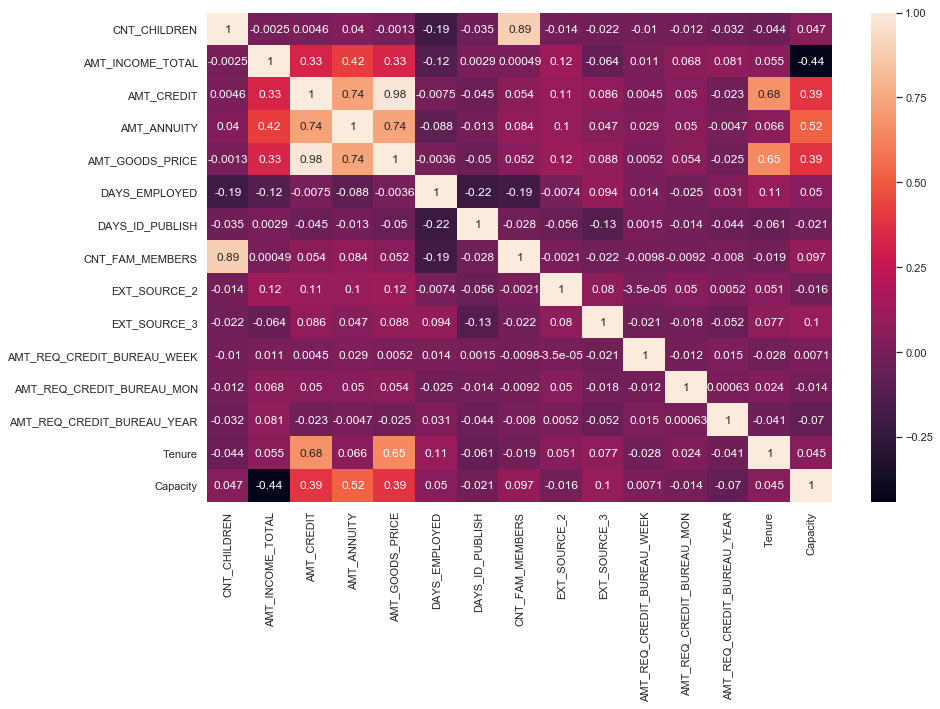

In [ ]:
#Plotting Heatmap for clients having difficulties



f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(dfnew_Target_1_correlation, 
            xticklabels=dfnew_Target_1_correlation.columns.values,
            yticklabels=dfnew_Target_1_correlation.columns.values,annot= True)
plt.show()

In [ ]:
#Top Correlations are ::
    
        #AMT_GOODS_PRICE AND AMT_CREDIT = 0.98
        #AMT_CREDIT AND ANT_ANNUITY= 0.74
        #AMT_INCOME_TOTAL and AMT_ANNUITY = 0.42
        #AMT_CREDIT AND CAPACITY = 0.39
        #AMT_GOODS_PRICE AND AMT_ANNUITY = 0.74
        #AMT_CREDIT AND TENURE = 0.68
        #AMT_GOODS_PRICE AND TENURE = 0.65
        #AMT_ANUITY AND CAPACITY = 0.52
        #TENURE AND AMT_GOODS_PRICE = 0.65
        #AMT_CREDIT AND CAPACITY = 0.39
        

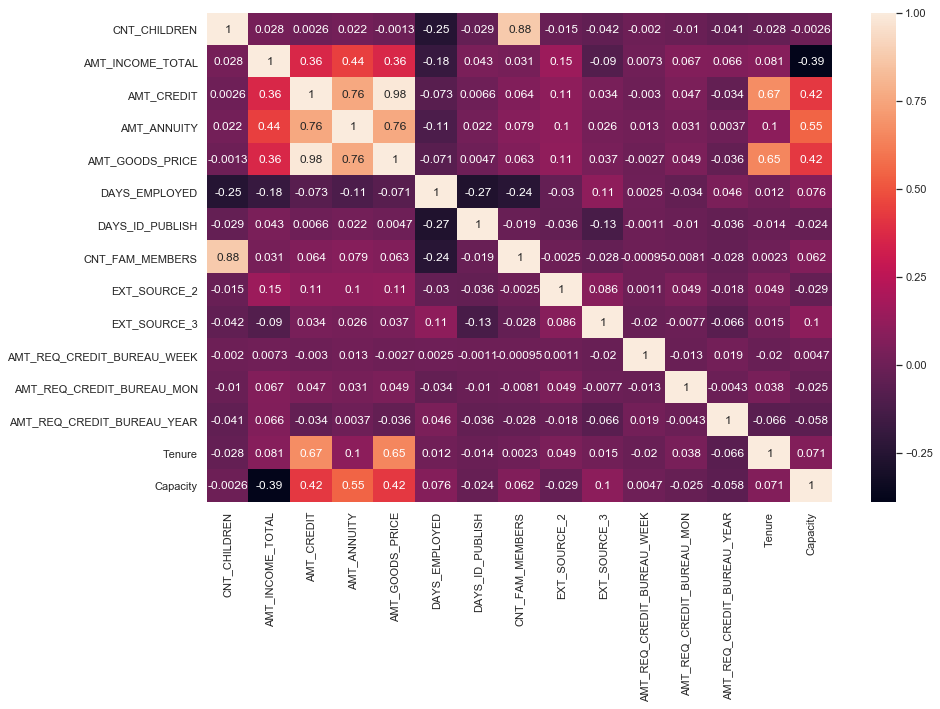

In [ ]:
# for all All other cases

dfnew_Target_0_correlation.drop('TARGET', axis = 0, inplace = True)
dfnew_Target_0_correlation.drop('TARGET', axis = 1, inplace = True)

f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(dfnew_Target_0_correlation, 
            xticklabels=dfnew_Target_0_correlation.columns.values,
            yticklabels=dfnew_Target_0_correlation.columns.values,annot= True)
plt.show()


In [ ]:
# top correlation

      ##AMT_GOODS_PRICE AND AMT_CREDIT = 0.98
        #AMT_GOODS_PRICE AND AMT_ANNUITY = 0.76
        #AMT_ANNUITY AND AMT_CREDIT = 0.76
        #AMT_CREDIT AND TENURE = 0.67
        #AMT_GOODS_PRICE AND TENURE = 0.65
        #AMT_CREDIT AND CAPACITY = 0.42
        #CAPCITY AND AMT_GOODS_PRICE = 0.42
        #TENURE AND AMT_GOODS_PRICE = 0.65
        
        #Example NOTE: we can see that capacity is more correlated with AMT_CREDIT in 2nd case than defaulter's case 
        #  and same with AMT_GOODS_PRICE AND AMT_ANNUITY

# MERGING OF APPLICATION FILE WITH PREVIOUS DATA

The objective is to merge and then segment further to see if there are any other insights we can get after adding of new columns.

In [ ]:
## Both the dataset have few columns with same name. We may need them for further analysis. Lets rename them accordingly.

df_previous = df_previous.rename(columns={'AMT_CREDIT': 'PRE_AMT_CREDIT', 'AMT_ANNUITY': 'PRE_AMT_ANNUITY','AMT_GOODS_PRICE':'PRE_AMT_GOODS_PRICE'})


In [ ]:
preAppDataDf = df_previous 

In [ ]:
# We can create a derived attribute. From the previous data, we have AMT_APPLICATION(amount requested) and AMT_CREDIT
# (amount approved by bank). We can see the difference of the value and mark them as greater,lesser,same and see if there
# is any trend here.
preAppDataDf['MARKER'] = preAppDataDf['PRE_AMT_CREDIT'] - preAppDataDf['AMT_APPLICATION']
preAppDataDf['MARKER'] = preAppDataDf['MARKER'].apply(lambda x:'Greater' if x>0 else ('Lesser' if x<0 else 'Same'))

In [ ]:
df11 = df['SK_ID_CURR'].copy()

In [ ]:
df12 = dfnew.join(df11)

In [ ]:
# Merge both the datasets on common ID which is the customer ID.
masterDataDf = pd.merge(df12, preAppDataDf, how='inner', on='SK_ID_CURR')

# Divide the master dataset based on Target (categorical variable) and perform further analysis

In [ ]:
#This is the dataset of the users for whome Target value is '1' those having difficulty paying on time and defaulted.
masterDefaulterDf = masterDataDf[masterDataDf.TARGET == 1]

#This is the dataset of the users having no payment difficulty and always paid on time
masterTimelyDf = masterDataDf[masterDataDf.TARGET == 0]

In [ ]:
#Create a master Df which will hold the temporary data for displaying

def univariateAnalyaisBarPlot(COLUMN_NAME):
    tempMasterDf = pd.DataFrame(columns=['Type','Contract Status','Frequency','Percentage'])

    tempMDefaultDf =  pd.DataFrame(columns=['Type','Contract Status','Frequency','Percentage'])
    tempTPayerDf =  pd.DataFrame(columns=['Type','Contract Status','Frequency','Percentage'])

    mdd = masterDefaulterDf[COLUMN_NAME].value_counts()
    tempMDefaultDf['Frequency'] = mdd.values
    tempMDefaultDf['Contract Status'] = mdd.index
    tempMDefaultDf['Type'] = 'Defaulter'
    tempMDefaultDf['Percentage'] = round((tempMDefaultDf['Frequency']/tempMDefaultDf.loc[:,'Frequency'].sum())*100,2)

    tdd = masterTimelyDf[COLUMN_NAME].value_counts()
    tempTPayerDf['Frequency'] = tdd.values
    tempTPayerDf['Contract Status'] = tdd.index
    tempTPayerDf['Type'] = 'Timely Payer'
    tempTPayerDf['Percentage'] = round((tempTPayerDf['Frequency']/tempTPayerDf.loc[:,'Frequency'].sum())*100,2)

    tempMasterDf = pd.concat([tempMDefaultDf,tempTPayerDf], axis=0)

    sns.catplot(x='Type', y='Percentage', hue='Contract Status', data=tempMasterDf, kind='bar')

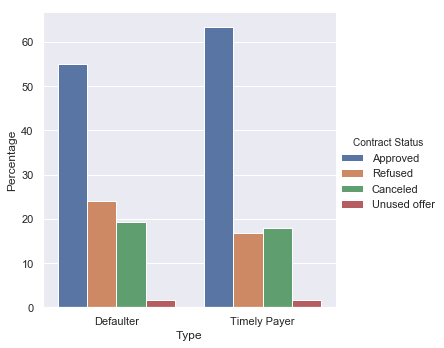

In [ ]:
univariateAnalyaisBarPlot('NAME_CONTRACT_STATUS')

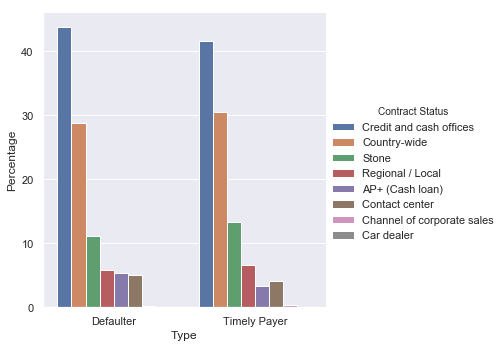

In [ ]:
univariateAnalyaisBarPlot('CHANNEL_TYPE')

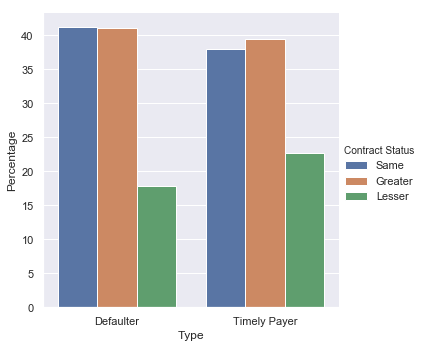

In [ ]:
univariateAnalyaisBarPlot('MARKER')